In [26]:
import cv2
import numpy as np
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
train_dataset = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "oddrationale/mnist-in-csv",
    "mnist_train.csv",
)

test_dataset = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "oddrationale/mnist-in-csv",
    "mnist_test.csv",
)


In [8]:
Xtr = train_dataset.iloc[1:, 1:]
Ytr = train_dataset.iloc[1:, 0]
Xte = test_dataset.iloc[1:, 1:]
Yte = test_dataset.iloc[1:, 0]

In [4]:

def openCVHOG(im):
    winSize = (20,20)
    blockSize = (10,10)
    blockStride = (5,5)
    cellSize = (10,10)
    nbins = 9
    derivAperture = 1
    winSigma = -1.
    histogramNormType = 0
    L2HysThreshold = 0.2
    gammaCorrection = 1
    nlevels = 64
    signedGradients = True

    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels, signedGradients)
    descriptor = np.ravel(hog.compute(im))

    return descriptor

# Raw data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


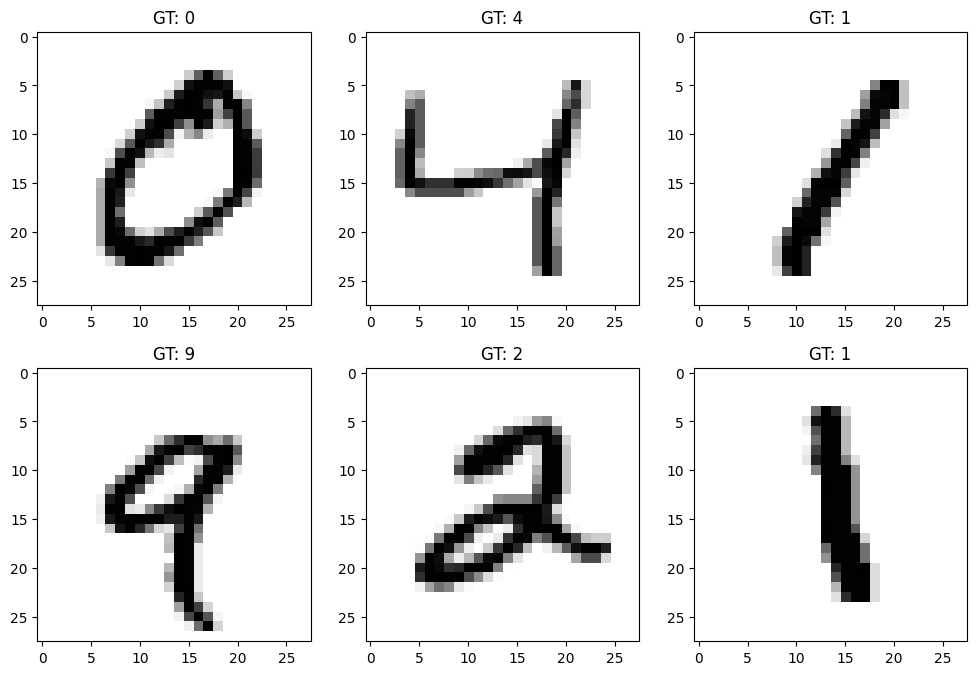

In [5]:
train_dataset.info()

axs = plt.subplots(2,3, figsize=(12, 8))[1].flatten()

for i in range(6):
    ax = axs[i]
    img = np.array(train_dataset.iloc[i+1, 1:])
    label = train_dataset.iloc[i+1, 0]
    ax.imshow(img.reshape(28,28), cmap="binary")
    ax.set_title(f"GT: {label}")

In [57]:
glm_results = np.ndarray(10, dtype=object)

for k in range(10):
    y = np.zeros_like(Ytr)
    y[Ytr == k] = 1
    glm_results[k] = sm.GLM(y, Xtr).fit()


probs.shape=(9999, 10)


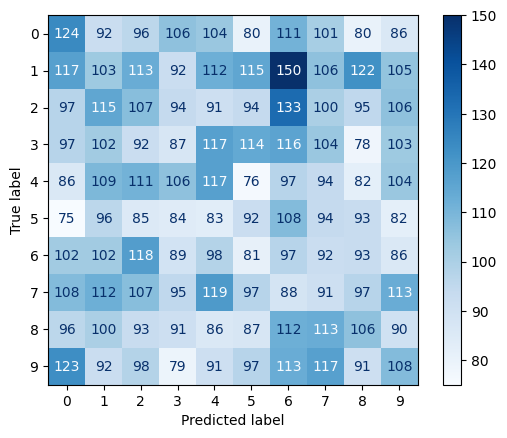

In [71]:
probs = np.array([results.predict(exog=Xte) for results in glm_results]).reshape(-1, 10)
print(f"{probs.shape=}")

pred = np.argmax(probs, axis=1)
pred.shape

cm = confusion_matrix(Yte, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()